In [ ]:
import sys

sys.path.append("..")
import pandas as pd
from layzee.feature_handling2 import *
from layzee.splitter_sampler import *
from layzee.dataframe_observer import *
from layzee.modeling import Modeling
from layzee.evaluation import MltClsEvaluation

In [2]:
titanic = pd.read_csv('../data/titanic.csv')
read_df_info(titanic)

------------------
846 rows, 12 columns.
------------------
               dtype  unique   unique%  missing  missing%
PassengerId    int64     846  1.000000        0  0.000000
Pclass         int64       3  0.003546        0  0.000000
Name          object     846  1.000000        0  0.000000
Sex           object       2  0.002364        0  0.000000
Age          float64      86  0.101655      170  0.200946
SibSp          int64       7  0.008274        0  0.000000
Parch          int64       7  0.008274        0  0.000000
Ticket        object     652  0.770686        0  0.000000
Fare         float64     243  0.287234        0  0.000000
Cabin         object     143  0.169031      654  0.773050
Embarked      object       3  0.003546        2  0.002364
Survived       int64       2  0.002364        0  0.000000
------------------


In [3]:
titanic = titanic[['Pclass', 'Sex', 'Fare', 'Age', 'SibSp', 'Parch', 'Embarked', 'Survived']]
read_df_info(titanic)

------------------
846 rows, 8 columns.
------------------
            dtype  unique   unique%  missing  missing%
Pclass      int64       3  0.003546        0  0.000000
Sex        object       2  0.002364        0  0.000000
Fare      float64     243  0.287234        0  0.000000
Age       float64      86  0.101655      170  0.200946
SibSp       int64       7  0.008274        0  0.000000
Parch       int64       7  0.008274        0  0.000000
Embarked   object       3  0.003546        2  0.002364
Survived    int64       2  0.002364        0  0.000000
------------------


-------------------------------------
Type: int64
Rows: 846
Distinct: 2
Missing: 0
Missing%: 0.0
-------------------------------------
Top 2 values:
   Survived  Count         %     Cum.%
0         0    527  0.622931  0.622931
1         1    319  0.377069  1.000000
-------------------------------------


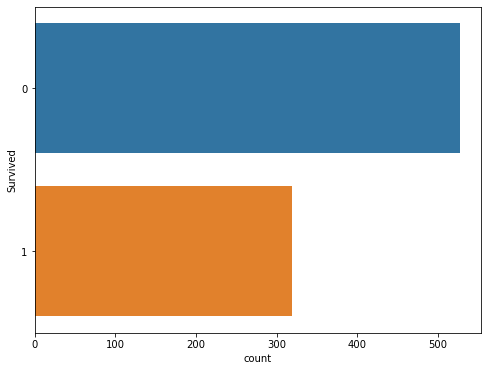

In [7]:
describe_cat_col(titanic, 'Survived')

In [4]:
train, test = split_df(titanic)
train.shape, test.shape

((676, 8), (170, 8))

In [5]:
read_df_info(train)

------------------
676 rows, 8 columns.
------------------
            dtype  unique   unique%  missing  missing%
Pclass      int64       3  0.004438        0  0.000000
Sex        object       2  0.002959        0  0.000000
Fare      float64     221  0.326923        0  0.000000
Age       float64      83  0.122781      139  0.205621
SibSp       int64       7  0.010355        0  0.000000
Parch       int64       6  0.008876        0  0.000000
Embarked   object       3  0.004438        1  0.001479
Survived    int64       2  0.002959        0  0.000000
------------------


['Age', 'Embarked']
0-0    536
1-0    139
0-1      1
dtype: int64


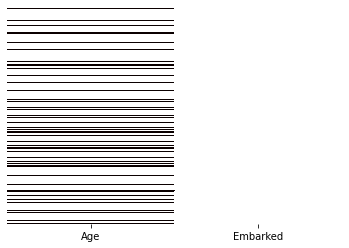

In [8]:
missing_pattern(train)

In [14]:
train,test = imputer(train,test, 'Age','median')
train,test = imputer(train,test,'Embarked','mode')

train_ed, test_ed,a,b,c = general_encoder(
    ['Age', 'Fare'],
    ['Embarked'],
    ['Pclass', 'Sex', 'SibSp', 'Parch', 'Survived'],
    return_encoders=True
)

In [15]:
read_df_info(train_ed)
read_df_info(test_ed)

------------------
676 rows, 23 columns.
------------------
              dtype  unique   unique%  missing  missing%
Age         float64      83  0.122781        0       0.0
Fare        float64     221  0.326923        0       0.0
Pclass_1    float64       2  0.002959        0       0.0
Pclass_2    float64       2  0.002959        0       0.0
Pclass_3    float64       2  0.002959        0       0.0
Sex_female  float64       2  0.002959        0       0.0
Sex_male    float64       2  0.002959        0       0.0
SibSp_0     float64       2  0.002959        0       0.0
SibSp_1     float64       2  0.002959        0       0.0
SibSp_2     float64       2  0.002959        0       0.0
SibSp_3     float64       2  0.002959        0       0.0
SibSp_4     float64       2  0.002959        0       0.0
SibSp_5     float64       2  0.002959        0       0.0
SibSp_8     float64       2  0.002959        0       0.0
Parch_0     float64       2  0.002959        0       0.0
Parch_1     float64       2 

-------------------------------------
Type: float64
Rows: 676
Distinct: 3
Missing: 0
Missing%: 0.0
-------------------------------------
Top 3 values:
   Embarked  Count         %     Cum.%
0       2.0    487  0.720414  0.720414
1       0.0    132  0.195266  0.915680
2       1.0     57  0.084320  1.000000
-------------------------------------


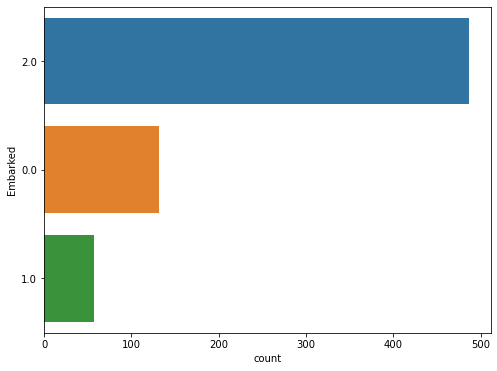

In [16]:
describe_cat_col(train_ed, 'Embarked')

In [17]:
X_train, X_test, y_train, y_test = split_train_test(train_ed, test_ed, 'Embarked')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 22), (170, 22), (676,), (170,))

In [18]:
print(X_train.columns.tolist())
print(X_test.columns.tolist())

['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Survived_0', 'Survived_1']
['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Survived_0', 'Survived_1']


In [19]:
md = Modeling(X_train, X_test, y_train, y_test, task='mlt', random_state=1445)
y_score, y_proba, best_model, best_score, best_params = md.modeling(model='rf',metric='accuracy',cv=2)

Time consumption: 18.59s.


In [20]:
labels = b.categories_[0].tolist()
eva = MltClsEvaluation(y_score, y_test, labels, y_proba)

1 for S, 0 for not S


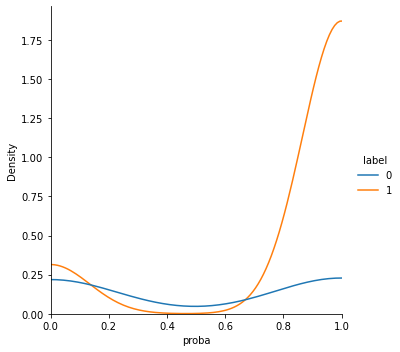

In [21]:
eva.density_chart('S')


In [22]:
eva.detailed_metrics()


Accuracy: 0.7529411764705882
Precision: 0.6354700854700855
Recall: 0.5920862068965517
F1_score: 0.6101479188166494
Hamming_Loss: 0.24705882352941178
Log_loss: 0.9137380375796343
Auc_Roc: 0.8218892175254978


Class: S
Model: ROC AUC=0.802


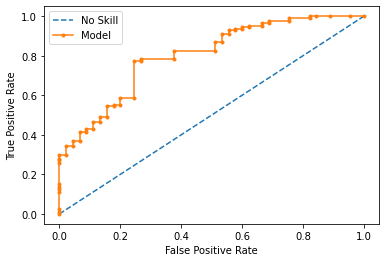

In [23]:
eva.roc_curve('S')

Class: S


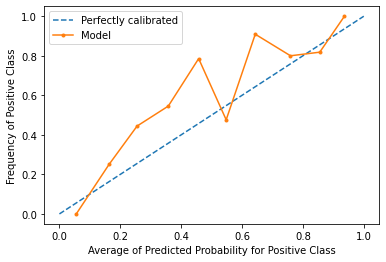

In [24]:
eva.calibration_curve('S')

In [25]:
eva.confusion_matrix(simple=False)

--------Confusion Matrix-----------
          Predicted_C  Predicted_Q  Predicted_S
Actual_C           14            0           15
Actual_Q            1            7            8
Actual_S           13            5          107
------------------------------
           Predicted_C  Predicted_Q  Predicted_S
Actual%_C         0.48         0.00         0.52
Actual%_Q         0.06         0.44         0.50
Actual%_S         0.10         0.04         0.86
------------------------------
          Predicted%_C  Predicted%_Q  Predicted%_S
Actual_C          0.50          0.00          0.12
Actual_Q          0.04          0.58          0.06
Actual_S          0.46          0.42          0.82
------------------------------
              precision    recall  f1-score   support

           C       0.50      0.48      0.49        29
           Q       0.58      0.44      0.50        16
           S       0.82      0.86      0.84       125

    accuracy                           0.75       170
   macr

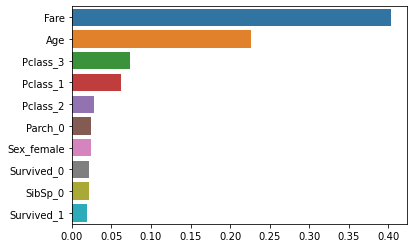

In [26]:
eva.feature_importance(best_model, X_train.columns.tolist())